# Download the buildings data

Question: How many buildings were mapped with RapID (Microsoft buildings) in selected region?

#### Import libs

In [135]:
import json
import os
import requests
import glob
from tqdm import tqdm
import time
import pandas as pd
import re
import json
import seaborn as sns
import numpy as np

### Get the data for every specified region

#### Definitions

In [2]:
os.chdir('..')


In [3]:
def get_json_names():

    home_dir = os.getcwd()
    geojson_dir = os.path.join(home_dir, f"downloaded-data-json", "")

    # Construct the file pattern
    file_pattern = os.path.join(geojson_dir, '*.json')
    # print(file_pattern)

    # Use glob to get the list of file names matching the pattern
    file_names = glob.glob(file_pattern)
    # print(file_names)

    # Extract the base names of the files without the extension
    names = [os.path.splitext(os.path.basename(file_name))[0]
            for file_name in file_names]
    # print(names)
    # Print the names

    return names
    

json_names = get_json_names()
json_names


['blds_africa_states_18-23_ai',
 'blds_continent_data_18-23_ai',
 'blds_northamerica_states_18-23_ai',
 'roads_africa_states_18-23_ai',
 'roads_asia_states_18-23_ai',
 'roads_continent_data_18-23_ai',
 'roads_europe_states_18-23_ai']

In [4]:
# def get_geojson_names():

#     # os.chdir('..')
#     home_dir = os.getcwd()
#     geojson_dir = os.path.join(home_dir, f"geojson-regions", "")

#     geojson_names = []
#     for root, dirs, files in os.walk(geojson_dir):
#         for file in files:
#             if file.endswith('.geojson'):
#                 file_path = os.path.join(root, file)
#                 file_name = os.path.splitext(os.path.basename(file_path))[1]
#                 geojson_names.append(file_name)
#         # geojson_names.extend(file_names)
#     print(geojson_names)
#     return geojson_names


# geojson_names = get_geojson_names()


In [5]:
json_dic = {k: v for k, v in enumerate(json_names)}
json_dic


{0: 'blds_africa_states_18-23_ai',
 1: 'blds_continent_data_18-23_ai',
 2: 'blds_northamerica_states_18-23_ai',
 3: 'roads_africa_states_18-23_ai',
 4: 'roads_asia_states_18-23_ai',
 5: 'roads_continent_data_18-23_ai',
 6: 'roads_europe_states_18-23_ai'}

In [6]:
# define the dictinaries

# data_dic = {0: "blds_continent-states_18-23_ai",
#             1: "blds_africa-states_18-23_ai",
#             2: "blds_northamerica-states_18-23_ai",
#             3: "blds_europe-states_18-23_ai",
#             4: "blds_asia-states_18-23_ai", }

# geojson_dic = {0: "geojson-continent-states",
#                       1: "geojson-africa-states",
#                       2: "geojson-northamerica-states",
#                       3: "geojson-europe-states",
#                       4: "geojson-asia-states",}

In [7]:
home_dir = os.getcwd()
indicators_dir = os.path.join(home_dir, f"indicators-data", "")


In [8]:
def get_indicators_names():

    home_dir = os.getcwd()
    indicators_dir = os.path.join(home_dir, f"indicators-data", "")

    # Construct the file pattern
    file_pattern = os.path.join(indicators_dir, '*.xlsx')
    # print(file_pattern)

    # Use glob to get the list of file names matching the pattern
    file_names = glob.glob(file_pattern)
    # print(file_names)

    # Extract the base names of the files without the extension
    names = [os.path.splitext(os.path.basename(file_name))[0]
             for file_name in file_names]
    # print(names)
    # Print the names

    return names


indicators_names = get_indicators_names()
indicators_names


['cellphone-usage',
 'disaster_deaths',
 'GDL-Subnational-HDI-data',
 'parliament-women-absolute',
 'parliament-women-percentage',
 'world-state-population',
 'YouthMappersChapters-List']

In [9]:
cols = ["country", 2018, 2019, 2020, 2021, 2022, 2023]


In [10]:

files = glob.glob(indicators_dir + '*.xlsx')

cols = ["country", 2018, 2019, 2020, 2021, 2022, 2023, "year", "value"]
data = {}

for file in files:
   file_name = os.path.basename(file)  # Extract the file name with extension
   # Extract the file name without extension
   df_name = os.path.splitext(file_name)[0]
   try:
      df = pd.read_excel(file, sheet_name="1")
      cols_intersection = list(set(df.columns).intersection(cols))
      df = df[cols_intersection]
      data[df_name] = df
   except:
      print(f"Error occured while reading {file_name}")


In [11]:
df_i = data['GDL-Subnational-HDI-data']
# df_str_cols = map(lambda x: str(x), df.columns)
cols_intersection = list(set(df_i.columns).intersection(cols))
cols_intersection

[2018, 2019, 2020, 2021, 'country']

In [12]:
data.keys()

dict_keys(['cellphone-usage', 'disaster_deaths', 'GDL-Subnational-HDI-data', 'parliament-women-absolute', 'parliament-women-percentage', 'world-state-population', 'YouthMappersChapters-List'])

In [13]:
df_to_melt = ['cellphone-usage', 'GDL-Subnational-HDI-data', 'world-state-population']


In [14]:
data["parliament-women-absolute"]


,country,year,value
0,Afghanistan,2018,69.0
1,Afghanistan,2020,67.0
2,Afghanistan,2021,67.0
3,Afghanistan,2022,67.0
4,Afghanistan,2023,NaN
...,...,...,...
1401,Zimbabwe,2019,86.0
1402,Zimbabwe,2020,86.0
1403,Zimbabwe,2021,86.0
1404,Zimbabwe,2022,81.0


In [15]:
data["disaster_deaths"]


,country,year,value
0,France,2018,6.0
1,Albania,2018,NaN
2,Brazil,2018,4.0
3,Cuba,2018,9.0
4,Brazil,2018,49.0
...,...,...,...
2923,Zambia,2023,NaN
2924,Zambia,2023,2.0
2925,Zimbabwe,2023,NaN
2926,Serbia,2023,2.0


In [16]:
melted_data = {}

for df_name in df_to_melt:
    df = data[df_name]
    df = df.melt(id_vars="country", var_name="year", value_name="value")
    melted_data[df_name] = df

In [17]:
melted_data.keys()

dict_keys(['cellphone-usage', 'GDL-Subnational-HDI-data', 'world-state-population'])

In [18]:
melted_data["world-state-population"]


,country,year,value
0,Afghanistan,2018,36686784
1,Albania,2018,2866376
2,Algeria,2018,41927007
3,American Samoa,2018,48424
4,Andorra,2018,75013
...,...,...,...
1325,Sub-Saharan Africa,2022,..
1326,Sub-Saharan Africa (excluding high income),2022,..
1327,Sub-Saharan Africa (IDA & IBRD countries),2022,..
1328,Upper middle income,2022,..


In [19]:
data['YouthMappersChapters-List']


""
0
1
2
3
4
...
365
366
367
368


In [20]:
df_i = df_i.loc[:, cols_intersection]

In [21]:


# Reshape the dataframe using melt
df_i = df_i.melt(id_vars='country', var_name='year', value_name='value')

df_i.head(10)


,country,year,value
0,Afghanistan,2018,0.483
1,Albania,2018,0.806
2,Algeria,2018,0.745
3,Andorra,2018,0.872
4,Angola,2018,0.595
5,Antigua and Barbuda,2018,0.798
6,Argentina urban,2018,0.850
7,Armenia,2018,0.771
8,Australia,2018,0.941
9,Austria,2018,0.917


In [22]:
data.update(melted_data)
form_data = data
del form_data['YouthMappersChapters-List']



In [23]:
form_data.keys()


dict_keys(['cellphone-usage', 'disaster_deaths', 'GDL-Subnational-HDI-data', 'parliament-women-absolute', 'parliament-women-percentage', 'world-state-population'])

## Data preparation

### Create dictionaries with json files and geojson folders

In [24]:
# get the directory with downloaded data
# os.chdir("..")
home_dir = os.getcwd()
data_dir = os.path.join(home_dir, "downloaded-data-json")


In [25]:
# create dictionary with json files
json_names = []
for (dir_path, dir_names, file_names) in os.walk(data_dir):
    json_names.extend(file_names)
print(json_names)

json_names.sort()

pattern = re.compile(r"^blds.+")
json_dic = {k: v for (k,v) in zip(range(len(json_names)), json_names) if pattern.match(v)}
json_dic

['blds_africa_states_18-23_ai.json', 'blds_continent_data_18-23_ai.json', 'blds_northamerica_states_18-23_ai.json', 'roads_africa_states_18-23_ai.json', 'roads_asia_states_18-23_ai.json', 'roads_continent_data_18-23_ai.json', 'roads_europe_states_18-23_ai.json']


{0: 'blds_africa_states_18-23_ai.json',
 1: 'blds_continent_data_18-23_ai.json',
 2: 'blds_northamerica_states_18-23_ai.json'}

In [26]:
# create list of folders with geojson files
geojson_folder_lst = []
for (dir_path, dir_names, file_names) in os.walk(home_dir):  # give the path
    for dir_name in dir_names:
        # print(dir_name)
        pattern = re.compile(r"^geojson.+states$")
        
        if pattern.match(dir_name):
            # print(dir_name)
            geojson_folder_lst.append(dir_name)
geojson_folder_lst


['geojson-hexagrid-states',
 'geojson-africa-states',
 'geojson-asia-states',
 'geojson-continent-states',
 'geojson-europe-states',
 'geojson-hexagrid-states',
 'geojson-northamerica-states']

In [27]:
# create location list from json files
location_lst = []
for _json in json_dic.values():
    match = re.search(r"(?<=_)[^_]+(?=_)",
                      _json)
    if match:
        substring = match.group(0)
        print(substring)
        location_lst.append(substring)
location_lst

africa
continent
northamerica


['africa', 'continent', 'northamerica']

In [28]:
# create a a list with the selection of geojson folders
sel_geojson_folder_lst = []
for location in location_lst:
    # print(location)
    for folder in geojson_folder_lst:
        # print(folder)
        if location in folder:
            sel_geojson_folder_lst.append(folder)
sel_geojson_folder_lst.sort()


In [29]:
sel_geojson_folder_lst


['geojson-africa-states',
 'geojson-continent-states',
 'geojson-northamerica-states']

In [30]:
# create final geojson_folder_dic according to the json_dic
geojson_folder_dic = {k: v for (k, v) in zip(json_dic.keys(), sel_geojson_folder_lst)}
geojson_folder_dic


{0: 'geojson-africa-states',
 1: 'geojson-continent-states',
 2: 'geojson-northamerica-states'}

### Definitions

In [31]:
# user input definition

while True:
    user_d_spec = input(f"Which data do you want to plot?\
                            Enter the number of the json file:\n\
                            {json_dic}"
                        )
    try:
        user_d_spec = int(user_d_spec)
    except ValueError:
        print(f"You wrote: {user_d_spec}, please enter a number.")
        continue
    if user_d_spec not in json_dic.keys():
        print(
            f"You wrote: {user_d_spec}, please enter one of these numbers: {json_dic.keys()}.")
        continue
    break


In [32]:
# function definitions

def data_spec(data_dic):
    
    try:
        with open(f"downloaded-data-json\\{data_dic[user_d_spec]}", "r") as f:
            data = json.load(f)
        return data
    except Exception as e:
        print(e)
        print("Please download the data first.")


def get_geojson_names(home_dir, geojson_folder_dic):
    geojson_dir = os.path.join(home_dir, "geojson-regions" , geojson_folder_dic[user_d_spec], "")

    geojson_names = []
    for (dir_path, dir_names, file_names) in os.walk(geojson_dir):  # give the path
        geojson_names.extend(file_names)
    print(geojson_names)
    return geojson_names


### Load the data

In [33]:
data = data_spec(json_dic)

### Edit the obtained data into desired shape to create a DataFrame

In [90]:
d = {
    "feature": [],
    "source": [],
    "timestamp": [],
    "value": []
}


In [91]:
for cont in data:
    for dic1 in cont:
        feature, source = dic1["groupByObject"][0], dic1["groupByObject"][1]
        for res in dic1["result"]:
            d["feature"].append(feature)
            d["source"].append(source)
            d["timestamp"].append(res["timestamp"])
            d["value"].append(res["value"])

df = pd.DataFrame(d)
# df

In [92]:
# extract only the year
df["year"] = pd.to_datetime(df["timestamp"]).dt.year

### Append the names of the regions to the DataFrame

In [93]:
geojson_folder_dic

{0: 'geojson-africa-states',
 1: 'geojson-continent-states',
 2: 'geojson-northamerica-states'}

In [94]:
# extract the geojson IDs and the names
geojson_names = get_geojson_names(home_dir, geojson_folder_dic)


['0_Ethiopia.geojson', '10_Democratic Republic of the Congo.geojson', '11_Namibia.geojson', '12_South Africa.geojson', '13_Libya.geojson', '14_Tunisia.geojson', '15_Zambia.geojson', '16_Sierra Leone.geojson', '17_Guinea.geojson', '18_Liberia.geojson', '19_Central African Republic.geojson', '1_South Sudan.geojson', '20_Sudan.geojson', '21_Djibouti.geojson', '22_Eritrea.geojson', '23_Ivory Coast.geojson', '24_Mali.geojson', '25_Senegal.geojson', '26_Nigeria.geojson', '27_Benin.geojson', '28_Angola.geojson', '29_Botswana.geojson', '2_Somalia.geojson', '30_Zimbabwe.geojson', '31_Chad.geojson', '32_Algeria.geojson', '33_Mozambique.geojson', '34_Eswatini.geojson', '35_Burundi.geojson', '36_Rwanda.geojson', '37_Uganda.geojson', '38_Lesotho.geojson', '39_Cameroon.geojson', '3_Kenya.geojson', '40_Gabon.geojson', '41_Niger.geojson', '42_Burkina Faso.geojson', '43_Togo.geojson', '44_Ghana.geojson', '45_Guinea-Bissau.geojson', '46_Egypt.geojson', '47_Mauritania.geojson', '48_Equatorial Guinea.geoj

In [95]:
geojson_names_2 = geojson_names

id_name_dic = {int(re.search(r'^\d+', k)[0]): re.search(r'\_.+\.', v)[0][1:-1] # using lib RegularExpression to separate the ID number and the state name
                for k, v in zip(geojson_names, geojson_names_2)}
id_name_ser = pd.Series(id_name_dic)
id_name_df = pd.DataFrame(id_name_ser, columns=["name"])
id_name_df = id_name_df.reset_index().rename(columns={"index": "id"})
id_name_df["id"] = id_name_df["id"].astype(int)
# id_name_df


In [96]:
# merge df with region names based on IDs
df = df.merge(id_name_df, how="left", left_on="feature",
               right_on="id")
# df.head(20)

In [97]:
df_i

,country,year,value
0,Afghanistan,2018,36686784
1,Albania,2018,2866376
2,Algeria,2018,41927007
3,American Samoa,2018,48424
4,Andorra,2018,75013
...,...,...,...
1325,Sub-Saharan Africa,2022,..
1326,Sub-Saharan Africa (excluding high income),2022,..
1327,Sub-Saharan Africa (IDA & IBRD countries),2022,..
1328,Upper middle income,2022,..


In [98]:
df

,feature,source,timestamp,value,year,id,name
0,0,remainder,2018-01-01T00:00:00Z,284919.0,2018,0,Ethiopia
1,0,remainder,2019-01-01T00:00:00Z,350579.0,2019,0,Ethiopia
2,0,remainder,2020-01-01T00:00:00Z,395155.0,2020,0,Ethiopia
3,0,remainder,2021-01-01T00:00:00Z,470680.0,2021,0,Ethiopia
4,0,remainder,2022-01-01T00:00:00Z,629701.0,2022,0,Ethiopia
...,...,...,...,...,...,...,...
655,9,source=microsoft/BuildingFootprints,2019-01-01T00:00:00Z,0.0,2019,9,Republic of the Congo
656,9,source=microsoft/BuildingFootprints,2020-01-01T00:00:00Z,0.0,2020,9,Republic of the Congo
657,9,source=microsoft/BuildingFootprints,2021-01-01T00:00:00Z,0.0,2021,9,Republic of the Congo
658,9,source=microsoft/BuildingFootprints,2022-01-01T00:00:00Z,0.0,2022,9,Republic of the Congo


In [99]:
form_data.keys()

dict_keys(['cellphone-usage', 'disaster_deaths', 'GDL-Subnational-HDI-data', 'parliament-women-absolute', 'parliament-women-percentage', 'world-state-population'])

In [100]:
# # Define the common column(s) to merge on
# merge_column = ['country', 'year']

# # Merge DataFrames from the dictionary based on the specified column(s)
# merged_df = pd.DataFrame()
# for key, df in form_data.items():
#     if merged_df.empty:
#         merged_df = df
#     else:
#         merged_df = pd.merge(merged_df, df, on=merge_column, how='outer')


In [101]:
form_data.keys()


dict_keys(['cellphone-usage', 'disaster_deaths', 'GDL-Subnational-HDI-data', 'parliament-women-absolute', 'parliament-women-percentage', 'world-state-population'])

In [102]:
df.rename(columns={"name": "country"}, inplace=True)


In [103]:
df

,feature,source,timestamp,value,year,id,country
0,0,remainder,2018-01-01T00:00:00Z,284919.0,2018,0,Ethiopia
1,0,remainder,2019-01-01T00:00:00Z,350579.0,2019,0,Ethiopia
2,0,remainder,2020-01-01T00:00:00Z,395155.0,2020,0,Ethiopia
3,0,remainder,2021-01-01T00:00:00Z,470680.0,2021,0,Ethiopia
4,0,remainder,2022-01-01T00:00:00Z,629701.0,2022,0,Ethiopia
...,...,...,...,...,...,...,...
655,9,source=microsoft/BuildingFootprints,2019-01-01T00:00:00Z,0.0,2019,9,Republic of the Congo
656,9,source=microsoft/BuildingFootprints,2020-01-01T00:00:00Z,0.0,2020,9,Republic of the Congo
657,9,source=microsoft/BuildingFootprints,2021-01-01T00:00:00Z,0.0,2021,9,Republic of the Congo
658,9,source=microsoft/BuildingFootprints,2022-01-01T00:00:00Z,0.0,2022,9,Republic of the Congo


In [104]:
pd.merge(df, form_data['disaster_deaths'],
         on=["country", "year"], how="inner")


,feature,source,timestamp,value_x,year,id,country,value_y
0,0,remainder,2018-01-01T00:00:00Z,284919.0,2018,0,Ethiopia,32.0
1,0,remainder,2018-01-01T00:00:00Z,284919.0,2018,0,Ethiopia,12.0
2,0,remainder,2018-01-01T00:00:00Z,284919.0,2018,0,Ethiopia,NaN
3,0,remainder,2018-01-01T00:00:00Z,284919.0,2018,0,Ethiopia,18.0
4,0,source=microsoft/BuildingFootprints,2018-01-01T00:00:00Z,0.0,2018,0,Ethiopia,32.0
...,...,...,...,...,...,...,...,...
1155,7,source=microsoft/BuildingFootprints,2022-01-01T00:00:00Z,0.0,2022,7,Morocco,21.0
1156,7,remainder,2023-01-01T00:00:00Z,292032.0,2023,7,Morocco,11.0
1157,7,remainder,2023-01-01T00:00:00Z,292032.0,2023,7,Morocco,11.0
1158,7,source=microsoft/BuildingFootprints,2023-01-01T00:00:00Z,49025.0,2023,7,Morocco,11.0


In [105]:
merged_data = {}
test_df = pd.DataFrame()

for key, df_i in form_data.items():
    # df_i = form_data[df_name]
    df = pd.merge(df, df_i, on=["country", "year"], how="left", suffixes=("", "_" + key))
    
    

    

In [129]:
sel_cols = list(df.columns[7:])
sel_cols

['value_cellphone-usage',
 'value_disaster_deaths',
 'value_GDL-Subnational-HDI-data',
 'value_parliament-women-absolute',
 'value_parliament-women-percentage',
 'value_world-state-population']

In [136]:
# Select columns where rows equal '..' and replace with NaN
selected_columns = df.loc[df.eq('..').any(axis=1)]
df[selected_columns.columns] = selected_columns.replace('..', np.nan)


In [140]:
my_df = df.loc[(df["source"] == "source=microsoft/BuildingFootprints"), sel_cols + ["value"]]
my_df


,value_cellphone-usage,value_disaster_deaths,value_GDL-Subnational-HDI-data,value_parliament-women-absolute,value_parliament-women-percentage,value_world-state-population,value
21,NaN,32.0,0.489,212.0,38.76,111129438.0,0.0
22,NaN,12.0,0.489,212.0,38.76,111129438.0,0.0
23,NaN,NaN,0.489,212.0,38.76,111129438.0,0.0
24,NaN,18.0,0.489,212.0,38.76,111129438.0,0.0
38,NaN,31.0,NaN,195.0,41.49,NaN,0.0
...,...,...,...,...,...,...,...
1312,NaN,NaN,NaN,4.0,16.67,NaN,0.0
1348,NaN,NaN,NaN,NaN,NaN,NaN,201082.0
1395,NaN,43.0,NaN,95.0,24.05,NaN,0.0
1396,NaN,11.0,NaN,95.0,24.05,NaN,0.0


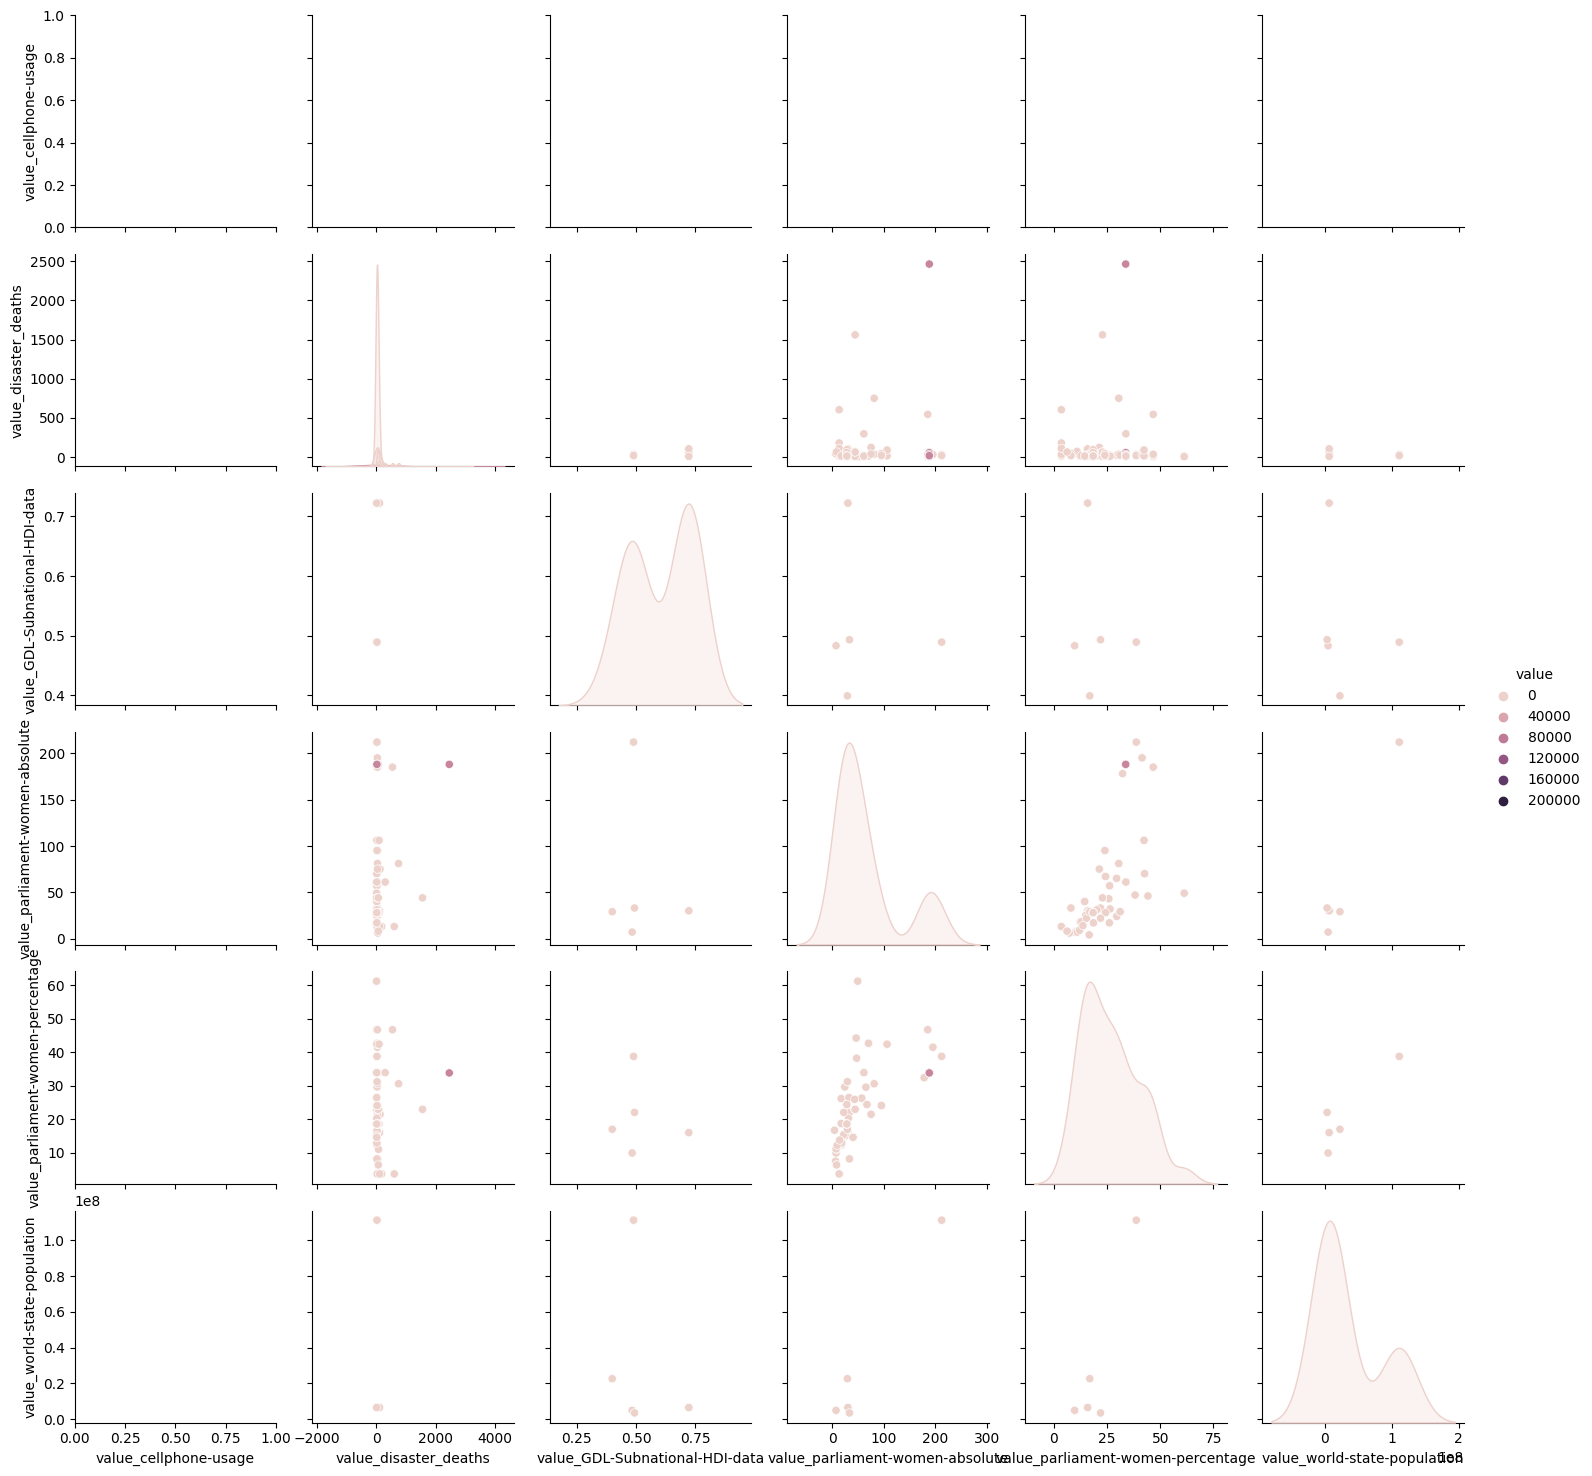

In [141]:
sns.pairplot(my_df, hue='value')


In [68]:
df = pd.merge(df, df_i, how="left", left_on=["name", "year"], right_on=["country", "year"])

KeyError: 'year'

In [ ]:
df.head(20)

,feature,source,timestamp,value_x,year,id,name,country,value_y
0,0,remainder,2018-01-01T00:00:00Z,284919.0,2018,0,Ethiopia,Ethiopia,0.489
1,0,remainder,2019-01-01T00:00:00Z,350579.0,2019,0,Ethiopia,Ethiopia,0.498
2,0,remainder,2020-01-01T00:00:00Z,395155.0,2020,0,Ethiopia,Ethiopia,0.498
3,0,remainder,2021-01-01T00:00:00Z,470680.0,2021,0,Ethiopia,Ethiopia,0.498
4,0,remainder,2022-01-01T00:00:00Z,629701.0,2022,0,Ethiopia,NaN,NaN
5,0,remainder,2023-01-01T00:00:00Z,753591.0,2023,0,Ethiopia,NaN,NaN
6,0,source=microsoft/BuildingFootprints,2018-01-01T00:00:00Z,0.0,2018,0,Ethiopia,Ethiopia,0.489
7,0,source=microsoft/BuildingFootprints,2019-01-01T00:00:00Z,0.0,2019,0,Ethiopia,Ethiopia,0.498
8,0,source=microsoft/BuildingFootprints,2020-01-01T00:00:00Z,0.0,2020,0,Ethiopia,Ethiopia,0.498
9,0,source=microsoft/BuildingFootprints,2021-01-01T00:00:00Z,0.0,2021,0,Ethiopia,Ethiopia,0.498


In [7]:
# define the user input

while True:
    if bool(json_dic):
        try:
            user_d_spec = int(input(f"Which data do you want to download?\
                                Enter {json_dic}"
                                    ))
        except ValueError:
            print("Please enter a number.")
            continue
        if user_d_spec not in range(len(json_dic)):
            print(f"Please enter {len(json_dic.keys())}")
            continue
        break
    else:
        print("Geojson_dic is empty, restart the kernel, please.")
        break

while True:
    try:
        user_d_format = int(input("Which data format do you want to export?\
                            Enter 0 for json format\
                            or 1 for geojson format"
                                ))
    except ValueError:
        print("Please enter a number.")
        continue
    if user_d_format not in range(0, 2):
        print("Please enter 0 or 1.")
        continue
    break


In [8]:
# define the functions

def convert_geojson_structure(original_dict):
    new_dict = {}
    new_dict["type"] = "FeatureCollection"
    new_dict["features"] = []

    feature_dict = {}
    feature_dict["type"] = "Feature"
    feature_dict["geometry"] = {}
    feature_dict["geometry"]["type"] = "MultiPolygon"

    new_dict["features"].append(feature_dict)

    feature_dict["geometry"]["coordinates"] = original_dict["geometry"]["coordinates"]
    # feature_dict["geometry"]["type"] = "MultiPolygon"
    feature_dict["properties"] = original_dict["properties"]

    return new_dict

def data_gen(feature):

    desired_geojson_structure = convert_geojson_structure(feature)

    parameters = {
        # pass GeoJSON as string.
        "bpolys": json.dumps(desired_geojson_structure),
        "filter": "building=* and building!=no and geometry:polygon",
        "groupByKey": "source",
        "groupByValues": "microsoft/BuildingFootprints",
        "format": "json",
        "time": "2018-01-01/2023-01-01/P1Y",
        }
    headers = {
        "accept": "application/json",
        "Content-Type": "application/x-www-form-urlencoded",
        }

    for value in parameters.values():
        assert value != "", "Please provide values for the parameters"

    while True:
        try:
            response = requests.post(url, data=parameters, headers=headers)
            response.raise_for_status()  # Raise an Exception if HTTP Status Code is not 200

            # print("Response:")
            # print(desired_geojson_structure["features"][0]["properties"]["NAME_EN"])
            # print(json.dumps(response.json(), indent=4))  # Pretty print response

            result = response.json()["groupByResult"]

            for state in result:
                state["groupByObject"][0] = desired_geojson_structure["features"][0]["properties"]["NAME_EN"]

            return result
        
        except requests.exceptions.RequestException:
            # Wi-Fi connection error occurred, wait for connection to be restored
            print("Waiting for Wi-Fi connection to be restored...")
            time.sleep(5)  # Wait for 5 seconds
            continue  # Continue to the next iteration of the loop

# londer version of the function
# def connect_feat_data(feature, data):

#     # Find the relevant value in data
#     rem_value_to_add = None
#     for elem in data:
#         if elem['groupByObject'][1] == 'remainder':
#             for result in elem['result']:
#                 if result['timestamp'] == '2023-01-01T00:00:00Z':
#                     rem_value_to_add = result['value']
#                     break
#             break


#     ai_value_to_add = None
#     for elem in data:
#         if elem['groupByObject'][1] == 'source=microsoft/BuildingFootprints':
#             for result in elem['result']:
#                 if result['timestamp'] == '2023-01-01T00:00:00Z':
#                     ai_value_to_add = result['value']
#                     break
#             break
#     # return value_to_add


#     blds_total = None
#     blds_total = rem_value_to_add + ai_value_to_add

#     # Calculate the AI percentage
#     ai_percentage = None
#     ai_percentage = (ai_value_to_add / (ai_value_to_add + rem_value_to_add)) * 100
    
#     # Add the value to the properties of feature
#     if rem_value_to_add is not None:
#         feature['properties']['mm_blds_2023'] = rem_value_to_add

#     if ai_value_to_add is not None:
#         feature['properties']['ai_blds_2023'] = ai_value_to_add

#     if blds_total is not None:
#         feature['properties']['blds_total'] = blds_total

#     if ai_percentage is not None:
#         feature['properties']['ai_percentage'] = ai_percentage

#     return feature


def connect_feat_data(feature, data):

    rem_value_to_add = None
    ai_value_to_add = None

    for elem in data:
        if elem['groupByObject'][1] == 'remainder':
            rem_value_to_add = find_value(elem, '2023-01-01T00:00:00Z')
        elif elem['groupByObject'][1] == 'source=microsoft/BuildingFootprints':
            ai_value_to_add = find_value(elem, '2023-01-01T00:00:00Z')

    blds_total = rem_value_to_add + ai_value_to_add\
        if rem_value_to_add is not None and ai_value_to_add is not None else None
    ai_percentage = (ai_value_to_add / (ai_value_to_add + rem_value_to_add)) * 100\
        if rem_value_to_add is not None and ai_value_to_add is not None else None

    if rem_value_to_add is not None:
        feature['properties']['mm_blds_2023'] = rem_value_to_add

    if ai_value_to_add is not None:
        feature['properties']['ai_blds_2023'] = ai_value_to_add

    if blds_total is not None:
        feature['properties']['blds_total'] = blds_total

    if ai_percentage is not None:
        feature['properties']['ai_percentage'] = ai_percentage

    return feature


def find_value(elem, timestamp):
    for result in elem['result']:
        if result['timestamp'] == timestamp:
            return result['value']
    return None


def return_json_data():

    data = []

    features = bpolys["features"]
    for i, feature in tqdm(enumerate(features), total=len(features)):

        obtained_data = data_gen(feature)
        # print(data)
        data.append(obtained_data)

    return data


def return_geojson_data():

    data = []

    features = bpolys["features"]
    for i, feature in tqdm(enumerate(features), total=len(features)):

        obtained_data = data_gen(feature)
        # print(data)
        feat_with_data = connect_feat_data(feature, obtained_data)
        # print(feat_with_data)
        # print(feature)
        data.append(feat_with_data)

    return data

# export the data


def export_data_as_json(name, data):
    with open(f"downloaded-data-json\\{name}.json", "w") as file:
        json.dump(data, file, indent=4)


# export_data_as_json(data_dic[user_d_spec], return_json_data)


def export_data_as_geojson(name, data):

    # Define the filename for the GeoJSON file
    filename = f'{name}.geojson'

    # Create a FeatureCollection from the structure
    feature_collection = {
        'type': 'FeatureCollection',
        'features': data
    }

    # Write the FeatureCollection to a GeoJSON file
    with open(f"downloaded-data-geojson\\{filename}", 'w') as file:
        json.dump(feature_collection, file, indent=4)


# export_data_as_geojson(data_dic[user_d_spec], return_geojson_data)


In [9]:
# define the URL

base_url = "https://api.ohsome.org/v1"
endpoint = "/elements/count/groupBy/boundary/groupBy/tag"
url = base_url + endpoint

#### Get the data

In [10]:
# read geojson data

# os.chdir('..')
# home_wd = os.getcwd()
# downloaded_data_geojson_dir = os.path.join(home_wd, "downloaded-data-geojson", "")

with open(f"geojson-regions\\{geojson_dic[user_d_spec]}.geojson", "r") as file:
    bpolys = json.load(file)


In [11]:
# convert_geojson_structure(bpolys["features"][3])


In [12]:
json_data = []
geojson_data = []

if user_d_format == 0:
    obtained_json_data = return_json_data()
    json_data.extend(obtained_json_data)
    export_data_as_json(geojson_dic[user_d_spec], obtained_json_data)
else:
    obtained_geojson_data = return_geojson_data()
    geojson_data.extend(obtained_geojson_data)
    export_data_as_geojson(geojson_dic[user_d_spec], obtained_geojson_data)


  6%|▌         | 3/53 [02:40<30:53, 37.07s/it]   

Waiting for Wi-Fi connection to be restored...
Waiting for Wi-Fi connection to be restored...
Waiting for Wi-Fi connection to be restored...
Waiting for Wi-Fi connection to be restored...
Waiting for Wi-Fi connection to be restored...
Waiting for Wi-Fi connection to be restored...
Waiting for Wi-Fi connection to be restored...
Waiting for Wi-Fi connection to be restored...
Waiting for Wi-Fi connection to be restored...
Waiting for Wi-Fi connection to be restored...
Waiting for Wi-Fi connection to be restored...
Waiting for Wi-Fi connection to be restored...
Waiting for Wi-Fi connection to be restored...


 25%|██▍       | 13/53 [10:49<24:31, 36.78s/it]  

In [ ]:
import pandas as pd

In [ ]:
d = {
    "feature": [],
    "source": [],
    "timestamp": [],
    "value": []
}

for region in json_data:
    for dic1 in region:
        feature, source = dic1["groupByObject"][0], dic1["groupByObject"][1]
        for res in dic1["result"]:
            d["feature"].append(feature)
            d["source"].append(source)
            d["timestamp"].append(res["timestamp"])
            d["value"].append(res["value"])

df = pd.DataFrame(d)


In [ ]:
# 
df

,feature,source,timestamp,value
